## Pré-processamento dados de entrada

In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = "dados"

import os
import copy
import numpy as np
import pandas as pd 


if __name__ == '__main__':
    # importa o arquivo e guarda em um dataframe do Pandas
    df_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'iris.csv'), sep=',', index_col=None) 

    print('Dados importados com sucesso!')

Dados importados com sucesso!


In [2]:
if __name__ == '__main__':
    df_dataset = df_dataset.drop(columns=['id_planta','cidade_origem'])

    display(df_dataset.head(n=10))

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
if __name__ == '__main__':
    idxRowNan = pd.isnull(df_dataset).any(axis=1).to_numpy().nonzero()
    
    display(df_dataset.iloc[idxRowNan])

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,NaN,1.7,0.5,Iris-setosa
24,4.8,NaN,1.9,0.2,Iris-setosa
30,4.8,3.1,NaN,0.2,Iris-setosa


In [4]:
def trataFaltantes( df_dataset ):
    dataWithoutClass = df_dataset.drop(columns=['classe'])
    df_dataset_final = copy.deepcopy(df_dataset)
    for indice in df_dataset.index:
        for column in dataWithoutClass.columns:
            if np.isnan(df_dataset[column][indice]):
                classRows = df_dataset[df_dataset['classe'] == df_dataset['classe'][indice]]
                classMean = np.nanmean(classRows[column])
                df_dataset_final[column][indice] = classMean
    
    return df_dataset_final.round(6)

if __name__ == '__main__':
    df_dataset = trataFaltantes( df_dataset )
    
    print('\nAmostras que possuiam valores faltantes:')
    display(df_dataset.iloc[idxRowNan])


Amostras que possuiam valores faltantes:


/var/folders/jj/95w3ygk90y70kjtmvk4b_4940000gn/T/ipykernel_8861/1981612751.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_dataset_final[column][indice] = classMean
/var/folders/jj/95w3ygk90y70kjtmvk4b_4940000gn/T/ipykernel_8861/19816

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,3.416667,1.700000,0.5,Iris-setosa
24,4.8,3.416667,1.900000,0.2,Iris-setosa
30,4.8,3.100000,1.461224,0.2,Iris-setosa


In [5]:
if __name__ == '__main__':
    df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

    # se tiver valores redundantes ou inconsistentes, imprima 
    if len(df_duplicates)>0:
        print('\nAmostras redundantes ou inconsistentes:')
        display(df_duplicates)
    else:
        print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor
102,5.8,2.7,5.1,1.9,Iris-virginica
123,7.7,2.8,6.7,2.0,Iris-virginica
124,7.7,2.8,6.7,2.0,Iris-virginica
144,5.8,2.7,5.1,1.9,Iris-virginica


In [6]:
def delDuplicatas( df_dataset ):
    df_dataset = df_dataset.drop_duplicates()
    return df_dataset

if __name__ == '__main__':
    df_dataset = delDuplicatas( df_dataset )


In [7]:
if __name__ == '__main__':
    df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

    if len(df_duplicates)>0:
        print('\nAmostras inconsistentes:')
        display(df_duplicates)
    else:
        print('Não existem mostras inconsistentes')
    


Amostras inconsistentes:


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor


In [8]:
def delInconsistencias( df_dataset ):

    dataWithoutClass = df_dataset.drop(columns="classe")
    df_dataset.drop_duplicates(subset=dataWithoutClass.columns, keep= False, inplace = True)
    
    
    return df_dataset

if __name__ == '__main__':
    df_dataset = delInconsistencias( df_dataset )

    df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

    if len(df_duplicates)>0:
        display(df_duplicates)
    else:
        print('Não existem amostras redundantes ou inconsistentes')
    

Não existem amostras redundantes ou inconsistentes


In [9]:
if __name__ == '__main__':
    
    print(df_dataset.describe())

       comprimento_sepala  largura_sepala  comprimento_petala  largura_petala
count          146.000000      146.000000          146.000000      146.000000
mean             5.958219        3.190639            3.795625        1.215753
std              1.493284        1.715087            1.755223        0.755822
min              4.300000        2.000000            1.000000        0.100000
25%              5.100000        2.800000            1.600000        0.300000
50%              5.800000        3.000000            4.400000        1.300000
75%              6.400000        3.400000            5.100000        1.800000
max             20.900000       23.100000            6.900000        2.500000


In [10]:
def normalizar(X):

    
    m, n = X.shape

    X_norm = np.random.rand(m,n) 
    mu = np.array([]) 
    sigma = np.array([]) 
    
    for j in range(n):
        mu = np.append(mu, np.mean(X[j], axis=0))
        sigma = np.append(sigma, np.std(X[j], axis=0, ddof=1))

    for i in range(m):
        for j in range(n):
            X_norm[i,j] = (X[i,j] - mu[j]) / sigma[j]
    
    return X_norm, mu, sigma

if __name__ == '__main__':
    X = df_dataset.iloc[:,0:-1].values

    X_norm, mu, sigma = normalizar(X)
    
    df_dataset.iloc[:,0:-1] = X_norm


In [11]:
if __name__ == '__main__':
    
    print(df_dataset.describe())

       comprimento_sepala  largura_sepala  comprimento_petala  largura_petala
count          146.000000      146.000000          146.000000      146.000000
mean             1.563798        0.400422            0.723718       -0.593150
std              0.685166        0.841988            0.878711        0.395255
min              0.802955       -0.184099           -0.675845       -1.176630
25%              1.170020        0.208645           -0.375470       -1.072040
50%              1.491202        0.306831            1.026284       -0.549094
75%              1.766501        0.503203            1.376722       -0.287621
max              8.419557       10.174524            2.277849        0.078442


Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


classe
Iris-setosa        47
Iris-versicolor    50
Iris-virginica     49
Name: count, dtype: int64

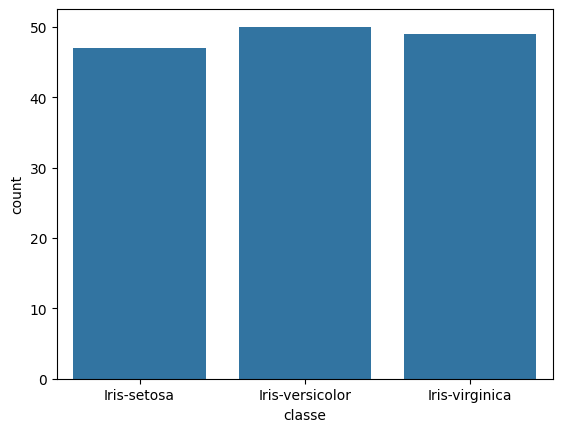

In [12]:
import seaborn as sns

if __name__ == '__main__':
    display( df_dataset['classe'].value_counts().sort_index() )
    sns.countplot(x="classe", data=df_dataset)

## Treinamento do Modelo

In [13]:
if __name__ == '__main__':
    transform = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    df_dataset_training = copy.deepcopy(df_dataset)
    df_dataset_training['classe'] = df_dataset_training['classe'].map(transform)
    display(df_dataset_training.sample(10))

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
53,1.995917,0.355924,1.276597,-0.444505,1
7,1.124137,0.503203,-0.425532,-1.124335,0
65,1.399436,0.257738,0.625783,-0.549094,1
93,1.491202,0.110459,0.826033,-0.601389,1
106,2.317099,0.306831,2.127661,-0.130737,2
90,1.353553,0.061366,0.826033,-0.549094,1
130,1.766501,0.208645,1.627035,-0.130737,2
8,0.848838,0.257738,-0.475595,-1.124335,0
32,1.215903,0.846854,-0.425532,-1.176630,0
64,1.628852,0.257738,1.176472,-0.496799,1


In [27]:
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


if __name__ == '__main__':
    y = df_dataset_training['classe']
    X = df_dataset_training.drop(columns=['classe'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_fit = knn_model.fit(X_train, y_train)
    knn_predictions = knn_fit.predict(X_test)
    knn_metric = metrics.accuracy_score(knn_predictions, y_test)
    print('Acurácia: ', knn_metric)
    



Acurácia:  0.9545454545454546


In [28]:
import pickle 
import joblib

if __name__ == '__main__':
    model_name = 'api/iris.pkl'
    diretorio_atual = os.getcwd()
    diretorio_pai = os.path.dirname(diretorio_atual)
    caminho_arquivo = os.path.join(diretorio_pai, model_name)
    
    # pickle.dump(knn_fit, open(caminho_arquivo, "wb"))
    joblib.dump(knn_fit, caminho_arquivo)

